# Introduction
What are the features that have the biggest impact on the predictions?<br>
This concept is called <b>feature importance</b>
<br>
<br>
There are multiple ways to measure the feature importance. Some approaches answer subtly different versions of the question above.<br>
Compared to most other approaches Permutation importance is:<br>
1) Fast to calculate <br>
2) Widely used and understood<br>
3) Consistent with properties we would want a feature importance measure to have<br><br>
## How it works?
Permutation importance uses models differently than anything seen so far and can be confusing. <br>
Consider the data with the following format:
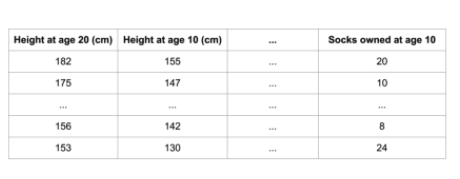

We want to predicts a person's height when they become 20 years old, using the data that is available at age 10.<br>
Our data includes useful features (height at age 10), features with little predictive power (socks owned), as well as other features.<br>

Permutation importance is calculated after a model has been fitted. So we won't change the model or change what predictions we'd get for a given value of height, sock-count, etc.<br>
Instead wee will ask the following question: It I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?<br>

<br>


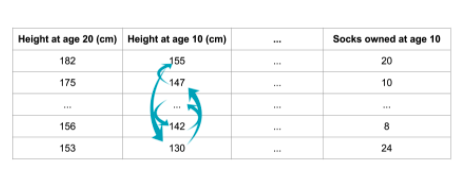

Randomly reordering a single column should cause less accurate predictions, since the resulting data no longer corresponds to anything observed in the real world. Modeel accuracy espicially suffers if we shuffle a column that the model relied on heavily for predictinons. In this case, shuffling 'height at age 10' would cause terrible predictions. If we shuffled 'socks owned' instead, the resulting predictions wouldn't suffer nearly as much.<br><br>
The process is as follows:<br>
1) Get a trained model<br>
2) Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and thee true target calues to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable that we just shuffled.<br>
3) Return the data to the original order (undoing the shuffle from step 2). Now repeat the step 2 with the next column in the dataset, until we have calculated the importance of each column.<br>


Our example will use a model that predicts whether a soccer/football team will have the "Man of the Game" winner based on the team's statistics. The "Man of the Game" award is given to the best player in the game. Model-building isn't our current focus, so the cell below loads the data and builds a rudimentary model.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('../Datasets/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [4]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


# Interpreting Permutation Importances

The values towards the top are most valuable features and those towards the bottom matter the least.<br>
The first number in each row shows how much model performance decreased with a random shuffling, in this case using 'accuracy' as the performance metric.<br>
There is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the processes with multiple shuffles. The number after the +- measures how performance varied from one-reshuffling to the next.<br>
We can see negative values for permutation importances. In those cases the predictions on the shuffled or noisy data happened to be more accurate than the real data. This happend when the feature didn't matter (should have an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is common in short datasets.<br>
In our dataset the most important feature was the Goals scored